## Part 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datapath1 = path + 'AE 460: Aerodynamics and Propulsion/AE 460 Lab Group/AE 460 Lab 4/AE 460 Lab 4 Data/Velocity Profile 66.7.csv'
df1 = pd.read_csv(datapath1)
df1

,Lateral Position [mm],Pitot/Static Vel [m/s],Pitot/Static Vel Stdev [m/s],Hot Wire Vel [m/s],Hot Wire Vel Stdev [m/s],q Corr Factor,Atm Press [Pa],Atm Temp [C],Density [kg/m^3],Average Tunnel Velocity [m/s],Streamwise location [mm]
0,-60,20.009,0.132,20.123,0.503,0.89,99500.0,21.5,1.177,20.155,66.7
1,-58,20.046,0.153,20.066,0.398,NaN,NaN,NaN,NaN,NaN,NaN
2,-56,20.068,0.125,20.050,0.451,NaN,NaN,NaN,NaN,NaN,NaN
3,-54,20.057,0.122,20.005,0.409,NaN,NaN,NaN,NaN,NaN,NaN
4,-52,20.034,0.143,19.968,0.341,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56,52,20.226,0.810,20.375,1.968,NaN,NaN,NaN,NaN,NaN,NaN
57,54,20.284,0.634,20.361,1.564,NaN,NaN,NaN,NaN,NaN,NaN
58,56,20.423,0.487,20.399,1.353,NaN,NaN,NaN,NaN,NaN,NaN
59,58,20.435,0.384,20.473,1.135,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datapath2 = path + 'AE 460: Aerodynamics and Propulsion/AE 460 Lab Group/AE 460 Lab 4/AE 460 Lab 4 Data/Velocity Profile 238.1 (TA Given).csv'
df2 = pd.read_csv(datapath2)
df2

,Lateral Position [mm],Pitot/Static Vel [m/s],Pitot/Static Vel Stdev [m/s],Hot Wire Vel [m/s],Hot Wire Vel Stdev [m/s],q Corr Factor,Atm Press [Pa],Atm Temp [C],Density [kg/m^3],Average Tunnel Velocity [m/s],Streamwise location [mm]
0,-60,20.141,0.206,20.161,0.454,0.89,98800.0,22.0,1.167,20.31,238.1
1,-58,20.142,0.228,20.191,0.459,NaN,NaN,NaN,NaN,NaN,NaN
2,-56,20.155,0.234,20.129,0.571,NaN,NaN,NaN,NaN,NaN,NaN
3,-54,20.073,0.270,20.033,0.664,NaN,NaN,NaN,NaN,NaN,NaN
4,-52,20.043,0.325,19.976,0.802,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56,52,20.346,0.434,20.800,1.299,NaN,NaN,NaN,NaN,NaN,NaN
57,54,20.394,0.400,20.788,1.206,NaN,NaN,NaN,NaN,NaN,NaN
58,54,20.423,0.391,20.768,1.200,NaN,NaN,NaN,NaN,NaN,NaN
59,54,20.400,0.408,20.730,1.106,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#x: nondimensional lateral location [(y-y0)/D]
y0_1 = 26 #mm
y0_2 = 2
D = 17.78 #mm = 0.7 in
x1 = (df1['Lateral Position [mm]'] - y0_1)/D
x2 = (df2['Lateral Position [mm]'] - y0_2)/D

#y: nondimensional velocity (u(y)/U_∞ )
import numpy as np
#--------------------------------------------
# Compute local gradient du/dy
df1['du_dy1'] = np.gradient(df1['Pitot/Static Vel [m/s]'], df1['Lateral Position [mm]'])

# Mask region where slope is near zero (freestream)
flat_region = df1[np.abs(df1['du_dy1']) < 0.01]  # tolerance depends on noise level

U_inf1 = flat_region['Pitot/Static Vel [m/s]'].mean()

y1 = df1['Pitot/Static Vel [m/s]'] / U_inf1
#-------------------------------------------
df1['du_dy2'] = np.gradient(df1['Hot Wire Vel [m/s]'], df1['Lateral Position [mm]'])
flat_region = df1[np.abs(df1['du_dy2']) < 0.01]  # tolerance depends on noise level
U_inf2 = flat_region['Hot Wire Vel [m/s]'].mean()

y2 = df1['Hot Wire Vel [m/s]'] / U_inf2
#--------------------------------------------------
df2['du_dy3'] = np.gradient(df2['Pitot/Static Vel [m/s]'], df2['Lateral Position [mm]'])
flat_region = df2[np.abs(df2['du_dy3']) < 0.01]  # tolerance depends on noise level
U_inf3 = flat_region['Pitot/Static Vel [m/s]'].mean()

y3 = df2['Pitot/Static Vel [m/s]'] / U_inf3
#----------------------------------------------------
df2['du_dy4'] = np.gradient(df2['Hot Wire Vel [m/s]'], df2['Lateral Position [mm]'])
flat_region = df2[np.abs(df2['du_dy4']) < 0.01]  # tolerance depends on noise level
U_inf4 = flat_region['Hot Wire Vel [m/s]'].mean()

y4 = df2['Hot Wire Vel [m/s]'] / U_inf4

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1253: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tu

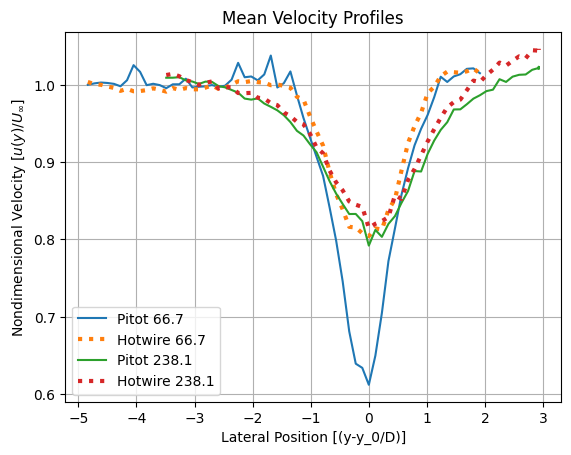

In [ ]:
plt.title("Mean Velocity Profiles")
plt.xlabel("Lateral Position [(y-y_0/D)]")
plt.ylabel("Nondimensional Velocity [$u(y)/U_∞$]")
plt.plot(x1, y1, label = "Pitot 66.7")
plt.plot(x1, y2, linestyle=':', linewidth=3, label = "Hotwire 66.7")
plt.plot(x2, y3, label = "Pitot 238.1")
plt.plot(x2, y4, linestyle=':', linewidth=3, label = "Hotwire 238.1")
plt.legend()
plt.grid()
plt.show()